# Homework 4: Solutions


<br>

**Conceptual:** Short answer questions. Be concise.

---
1. Consider the problem of classifying a binary response variable (i.e., $y \in \{1,0\}$). If there is no overlap in the values of X when y = 1 and when y=0,  such that there is a large “gap” between the two distributions of X values, then this is problematic for one of the classifiers discussed in class and the text. What classifier does this situation pose a problem for? Explain conceptually why this is a problem and compare it with another classifier approach that does not suffer this limitation.

**Answer:**
Logistic regression may become unstable when the classes aer well seperated. In the case of this example, logistic regression may become unstable given the present "gap". However, LDA is a method that is utilized to seperate data into meaningful groups.  While logistic regression models x and y scores of each categories together, LDA models their distribution seperates.  That is, each data point of x corresponds to a unique category of Y.  Therefore, LDA analysis estimates a probability distribution of X given an specific Ys. 

---
2. Compare logistic regression, LDA, and kNN classification approaches. Which are parametric which are non-parametric? For parametric models what functions do they assume? For non-parametric methods, how do the classifiers separate groups? How is the flexibility/bias tradeoff adjusted for each method?




**Answer:** 
Logistic regression and LDA are both parametric. However, logistic regression is estimated/fit through supervised learning LDA while LDA is run through unservised methods. KNN is an unsupervised nonparametric classifier. KNN classifies data points into seperate groups through a criterion (k) provided. To illustrate the process of classification with KNN consider the objecti ve of classifying data points into two groups, x and y.  If we set k = 2, data points will be assigned to groups if its two closest neighbors and either y or x.  The flexibility for KNN changes as a function of k.  


---
3. What is the curse of dimensionality? Why is it especially problematic for kNN classification (i.e., why does kNN fail in high dimensional contexts)?


**Answer:**
KNN fails when the dimensionality of the model gets too high relative to the total number of observations.  

The curse of dimensionality states that as the number of predictors increases towards the number of total observations the model becomes more flexible, but less generalizable.
  - Therefore, as the number of predictors increase accuracey also increases for the training set. However, accuracey decreases on the test set as the number of parameters increase durning model fitting on the training set. 
  - Model interprability decreases as the number of predictors increase

---
4. Suppose that we take a data set, divide it into equally-sized training and test sets, and then try out two different classification procedures. First we use logistic regression and get an error rate of 20% on the training data and 30% on the test data. Next we use 1-nearest neighbors (i.e. K = 1) and get an average error rate (averaged over both test and training data sets) of 18%. Based on these results, which method should we prefer to use for classification of new observations? Why?

**Answer:** 
* For KNN with K=1, the training error rate is 0% because for any training observation, its nearest neighbor will be the response itself. So, that means that KNN has a test error rate of 36%. Thus logistic regression is preferred because of its lower test error rate of only 30%.

---
**Applied:** Show your code & plots
(Exercises 4.10 and 4.11 from ISLR.)

---

5. This question should be answered using the Weekly data set, which is part of the ISLR package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

(a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

(b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

(e) Repeat (d) using LDA.

(f) Repeat (d) using QDA.

(g) Repeat (d) using KNN with K = 1.

(h) Which of these methods appears to provide the best results on
this data?

(i) Experiment with different combinations of predictors, includ- ing possible transformations and interactions, for each of the methods. Report the variables, method, and associated confu- sion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

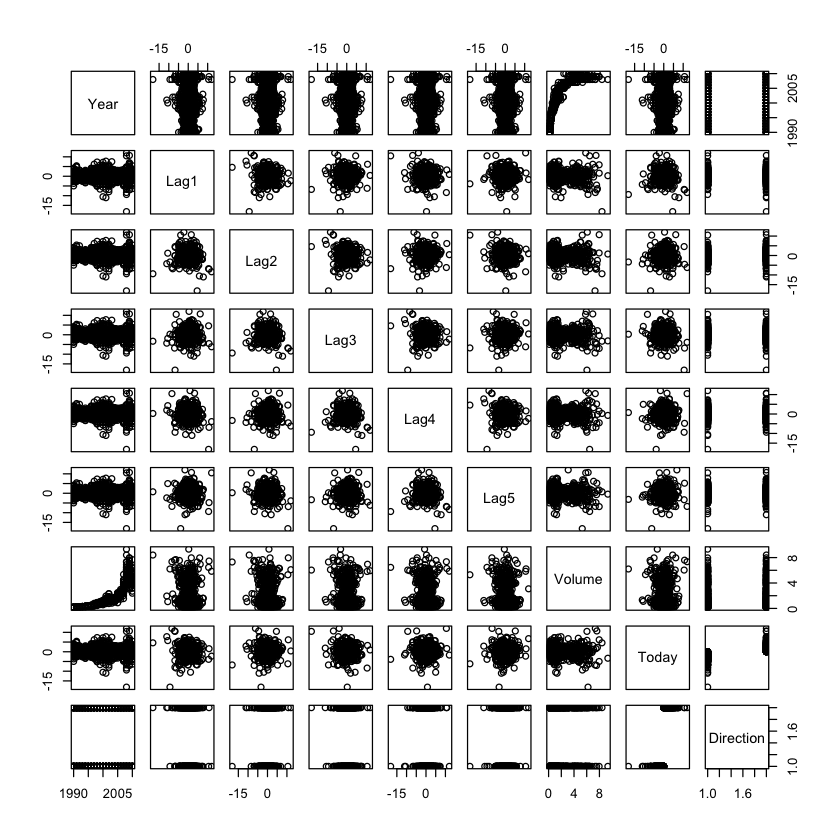

In [2]:
# ------------------
# Exercize 5
# ------------------

library(ISLR)
Weekly <- Weekly
summary(Weekly)
pairs(Weekly)

In [7]:
#logistic regression for all variables
direction_logression <- glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data = Weekly, family = binomial)
summary(direction_logression)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


Lag 2 is the only significant predictor of direction.

In [8]:
#Confusion Matrix
library(ISLR)
direction_logression <- glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data = Weekly, family = binomial)


#Confusion matrix
predicted_outcome <- predict(direction_logression, type = 'response')
CM_dat <- rep("Up", length(predicted_outcome))
CM_dat[predicted_outcome > 0.5] <- "Down"
table(CM_dat, Direction)


ERROR: Error in table(CM_dat, Direction): object 'Direction' not found


*My confusion matrix appears to be upside down and I am not sure what I did wrong.*  
However, assuming I am correct confusion matrix tells us that when we investigate the accuracey of the predictions is about 56%.  I would infer from this statistic that the prediction accuracey is too low to be trustable as it is just above chance.



In [11]:
#Fixed confusion matrix:
predicted_outcome <- predict(direction_logression, type = 'response')
CM_dat <- rep("Down", length(predicted_outcome))
CM_dat[predicted_outcome > 0.5] <- "Up"
table(CM_dat, Direction)

ERROR: Error in table(CM_dat, Direction): object 'Direction' not found


In [10]:
weekly <- Weekly
training <- (Year < 2008)
weekly_2 <- weekly[!training,]
#sanity check for above functions
range(weekly_2$Year)

glm2 <- glm(Direction ~ Lag2, data = Weekly, family = "binomial", subset = training)
summary(glm2)

predicted_outcome_2 <- predict(glm2, data = weekly_2, type = 'response')
CM_dat2 <- rep("Down", length(predicted_outcome_2))
CM_dat2[predicted_outcome > 0.5] <- "Up"
table(CM_dat2, Direction)

ERROR: Error in eval(expr, envir, enclos): object 'Year' not found


It appears that only allowing lag2 in this subset of dates increases prediction accuracey to 57%.

In [ ]:
??lda
library(MASS)
lda_1 <- lda(Direction ~ Lag2, data = Weekly, subset = training)
lda_1

In [ ]:
lda.CM <- predict(lda_1, weekly_2)
table(lda.CM, Direction)

In [ ]:
#Now with QDA
qda_1 <- qda(Direction~Lag2, data = weekly, subset = training)
qda_1

In [ ]:
#Now with K fold with k = 1
library(class)
library(class)
data_training_set <- as.matrix(Lag2[training])
data_test_set <- as.matrix(Lag2[!training])
train.Direction <- Direction[training]
knearestneighbor <- knn(data_training_set, data_test_set, cl = train.Direction, k =1)
summary(knearestneighbor)

Logistic regression and LDA presented similar model outputs and have the lowest error rates so I believe them to be the best models. 

---


6. In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.


(a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() function. Note you may find it helpful to use the data.frame() function to create a single data set containing both mpg01 and the other Auto variables.

In [21]:
Auto <- Auto
str(Auto)
Auto$mpg01 <- ifelse(Auto$mpg > median(Auto$mpg), 1, 0)

'data.frame':	392 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : num  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : num  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : num  3504 3693 3436 3433 3449 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : num  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 49 36 231 14 161 141 54 223 241 2 ...


(b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

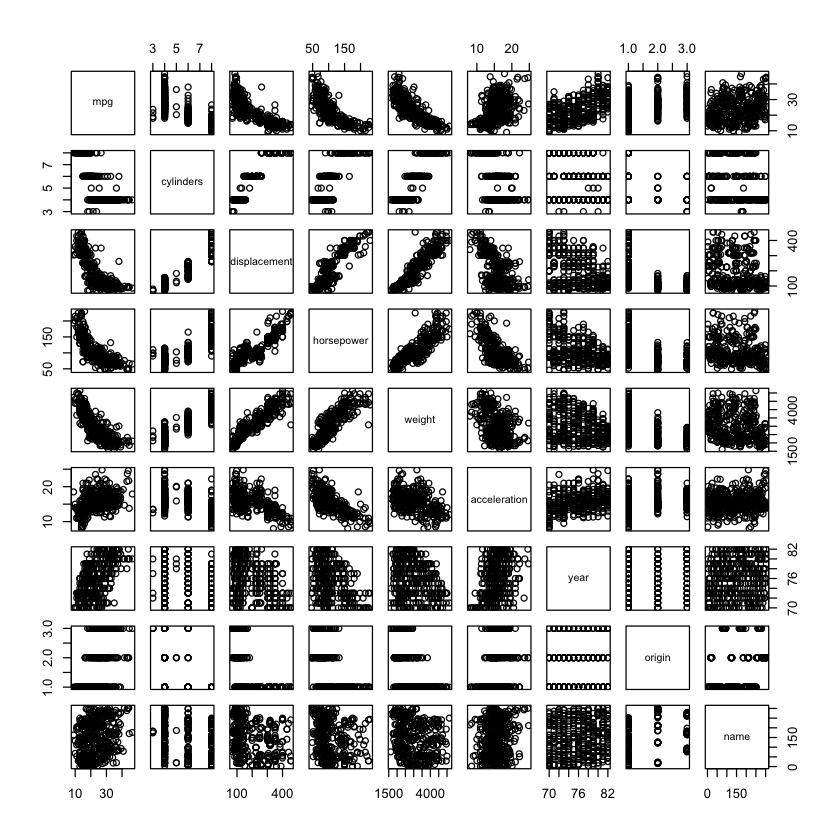

In [14]:
pairs(Auto)

In [15]:
Auto_2 <- Auto
Auto_2$name <- NULL             
cor(Auto_2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


mpg01 has stron  egative correlations with cylinders, displacement, and weight.  Moderate negative correlations with horsepower. And moderate positve correlations with origin.  Given that it was transformed from MPG, the high correlation between mpg01 and mpg is not surprising.

Split the data into a training set and a test set.

In [22]:
library(caret)
library(MASS)
trainIndex <- createDataPartition(Auto$year, p = .8, list = FALSE, times = 1)
head(trainIndex)
autoTrain <- Auto[trainIndex,]
autoTest <- Auto[-trainIndex,]
mpg01.test <- Auto$mpg01[!trainIndex]

Resample1
1
2
3
4
5
7


(d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [23]:
lda_2 <- lda(mpg01 ~ cylinders + displacement + horsepower + weight, data =  autoTrain)
lda_2_predict <- predict(lda_2, autoTest)
lda.class <- lda_2_predict$class
table(lda.class, autoTest$mpg01)
mean(lda.class==autoTest$mpg01)

         
lda.class  0  1
        0 34  1
        1  9 33

[1] 0.8701299

Error rate:

In [ ]:
lda_predicted <- predict(lda_2, autoTest)
table(lda_predicted$class, mpg01.test)

(e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [24]:
qda_2 <- lda(mpg01 ~ cylinders + displacement + horsepower + weight, data =  autoTrain)
print(qda_2)
qda_2_predict <- predict(qda_2, autoTest)
qda.class <- qda_2_predict$class
table(qda.class, autoTest$mpg01)
mean(qda.class==autoTest$mpg01)

Call:
lda(mpg01 ~ cylinders + displacement + horsepower + weight, data = autoTrain)

Prior probabilities of groups:
        0         1 
0.4857143 0.5142857 

Group means:
  cylinders displacement horsepower   weight
0  6.843137     275.4967  131.59477 3641.059
1  4.203704     116.4630   78.47531 2341.562

Coefficients of linear discriminants:
                       LD1
cylinders    -0.5440216140
displacement -0.0003944683
horsepower    0.0030067245
weight       -0.0009770239


         
qda.class  0  1
        0 34  1
        1  9 33

[1] 0.8701299

(f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [33]:
glm2 <- glm(mpg01 ~ cylinders + displacement + horsepower + weight, data =  autoTrain, family = "binomial")
glm_2_predict <- predict(glm2, autoTest)
glm2.class <- glm_2_predict$class
table(glm2.class, autoTest$mpg01)
mean(glm2.class==autoTest$mpg01)

                      
glm2.class             0 1
  -11.9416086032847    1 0
  -10.9778699656152    1 0
  -10.6985065913242    1 0
  -9.94646587526697    1 0
  -9.78777200139966    1 0
  -8.26583561396594    1 0
  -8.26569410454118    1 0
  -8.25780355637743    1 0
  -8.12555866148801    1 0
  -7.89546438404289    1 0
  -6.98859140036349    1 0
  -6.89305369290689    1 0
  -6.84852889012732    1 0
  -6.76311249897561    1 0
  -6.74690813769399    1 0
  -6.37785609246771    1 0
  -6.2133310341869     1 0
  -5.46911290958842    1 0
  -5.31753063124139    1 0
  -4.23070898960889    1 0
  -3.39987409270827    1 0
  -2.46313064152485    1 0
  -2.34349476261671    1 0
  -2.32131118348449    1 0
  -2.28784220353403    1 0
  -2.02870234933648    1 0
  -1.81504218319088    0 1
  -1.80714901352673    1 0
  -1.40313694556502    1 0
  -1.38142799930429    1 0
  -1.24517391842998    1 0
  -1.07638681425806    1 0
  -0.96419565431692    1 0
  -0.736327527738222   1 0
  -0.23887905680626    1 0
  -0.

[1] 0

In [ ]:
(g) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [43]:
knn2 = sapply(1:20,function(x){
    pred = knn(autoTrain[,c('cylinders', 'displacement','horsepower','weight')],
               autoTest[,c('cylinders', 'displacement','horsepower','weight')], 
               cl = autoTrain[,'mpg01'],k=x,l=x/2)
    mean(pred != autoTest[,'mpg01'])
  })
summary(knn2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5584  0.5584  0.5584  0.5584  0.5584  0.5584 

In [ ]:
# ------------------
# Exercize 6
# ------------------

# INSERT CODE HERE